In [27]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import random
import io

In [104]:
vars = {}
mars = {}
scipy.io.loadmat("ex4data1.mat",vars)
X_original = vars['X']
m = len(X_original)
X = np.concatenate((np.ones((m,1)),X_original),axis=1)
y = vars['y']
np.place(y,y==10,0)
scipy.io.loadmat('ex4weights.mat',mars)
theta1 = mars['Theta1']
theta2 = mars['Theta2']
number_of_classes = 10

In [97]:
def one_hot_encoding(labels,class_nr):
    new_labels = np.copy(labels)
    np.place(new_labels,new_labels==class_nr,1)
    np.place(new_labels,new_labels!=1,0)
    return new_labels

In [98]:
from IPython.display import Image
from IPython.display import display
import PIL.Image

def createarray(dataset,size):
    random.seed()
    for ol in range(size):
        for il in range(size):
            if il == 0:
                random_int = random.randint(0,dataset.shape[0]-1)
                new_array_horizontal = dataset[random_int]
                new_array_horizontal = new_array_horizontal[:,np.newaxis]
                new_array_horizontal = new_array_horizontal.reshape((20,20))
            else:                
                random_int = random.randint(0,dataset.shape[0]-1)
                next_array_horizontal = dataset[random_int]
                next_array_horizontal = next_array_horizontal[:,np.newaxis]
                next_array_horizontal = next_array_horizontal.reshape((20,20))
                new_array_horizontal = np.concatenate((new_array_horizontal,next_array_horizontal),axis=0)
        
        
        if ol == 0:
            new_array = new_array_horizontal
        else:
            new_array = np.concatenate((new_array,new_array_horizontal),axis=1)
    return new_array        

        
    

def showarray(a, fmt='jpeg'):
    #a = a[:,np.newaxis]
    #a = a.reshape((20,20))
    a = a*255
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

def plot_amount(dataset,amount):
    random.seed()
    for x in range(amount):
        i = random.randint(0,dataset.shape[0]-1)
        showarray(X[i])
    
    
    

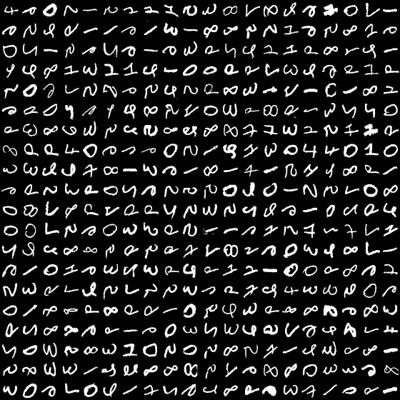

In [99]:
showarray(createarray(X_original,20))

In [137]:
def sigmoid(x):
    return scipy.special.expit(x)


def predict(dataset,weights1,weights2):
    a1 = dataset.T
    z2 = np.dot(weights1,a1)
    a2 = sigmoid(z2)
    #print("a2.shape",a2.shape)
    #print("theta2 shape", weights2.shape)
    a2 = np.concatenate((np.ones((1,m)),a2),axis=0)
    z3 = np.dot(weights2,a2)
    #print(z3.shape)
    a3 = sigmoid(z3)
    #print(a3.shape)
    #prediction = np.argmax(a3,axis=0)
    #prediction = prediction +1
    #np.place(prediction,prediction==10,0)
    #prediction = prediction[:,np.newaxis]
    prediction = a3
    return prediction

In [139]:
predict(X,theta1,theta2).shape

(10, 5000)

In [151]:
def cost(dataset,weights1,weights2,labels):
    cost = 0
    prediction = predict(dataset,weights1,weights2)
    orig_labels = labels
    
    return cost

In [152]:
cost(X,theta1,theta2,y)

-27413.585769348098

In [112]:
cost


<function __main__.cost>